<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html boltzmann.do.txt --no_mako -->
<!-- dom:TITLE: Boltzmann machines and energy models -->

# Boltzmann machines and energy models
**Morten Hjorth-Jensen**, Department of Physics and Center for Computing in Science Education, University of Oslo, Norway and Department of Physics and Astronomy and Facility for Rare Isotope Beams, Michigan State University, East Lansing, Michigan, USA

Date: **November 5-8, 2024**

## Essential elements of generative models

The aim of generative methods is to train a probability distribution $p$. The methods we will focus on are:
1. Energy based models, with the family of Boltzmann distributions as a typical example and if we get time

2. Variational autoencoders, based on our discussions on autoencoders

3. Diffusion models

## Energy models

Let us define a domain $\boldsymbol{X}$ of stochastic variables $\boldsymbol{X}= \{x_0,x_1, \dots , x_{n-1}\}$ with a pertinent probability distribution

$$
p(\boldsymbol{X})=\prod_{x_i\in \boldsymbol{X}}p(x_i),
$$

where we have assumed that the random varaibles $x_i$ are all independent and identically distributed (iid).

We will now assume that we can define this function in terms of optimization parameters $\boldsymbol{\Theta}$, which could be the biases and weights of deep network, and a set of hidden variables we also assume to be random variables which also are iid. The domain of these variables is
$\boldsymbol{H}= \{h_0,h_1, \dots , h_{m-1}\}$.

## Probability model

We define a probability

$$
p(x_i,h_j;\boldsymbol{\Theta}) = \frac{f(x_i,h_j;\boldsymbol{\Theta})}{Z(\boldsymbol{\Theta})},
$$

where $f(x_i,h_j;\boldsymbol{\Theta})$ is a function which we assume is larger or
equal than zero and obeys all properties required for a probability
distribution and $Z(\boldsymbol{\Theta})$ is a normalization constant. Inspired by
statistical mechanics, we call it often for the partition function.
It is defined as (assuming that we have discrete probability distributions)

$$
Z(\boldsymbol{\Theta})=\sum_{x_i\in \boldsymbol{X}}\sum_{h_j\in \boldsymbol{H}} f(x_i,h_j;\boldsymbol{\Theta}).
$$

## Marginal and conditional probabilities

We can in turn define the marginal probabilities

$$
p(x_i;\boldsymbol{\Theta}) = \frac{\sum_{h_j\in \boldsymbol{H}}f(x_i,h_j;\boldsymbol{\Theta})}{Z(\boldsymbol{\Theta})},
$$

and

$$
p(h_i;\boldsymbol{\Theta}) = \frac{\sum_{x_i\in \boldsymbol{X}}f(x_i,h_j;\boldsymbol{\Theta})}{Z(\boldsymbol{\Theta})}.
$$

## Change of notation

**Note the change to a vector notation**. A variable like $\boldsymbol{x}$
represents now a specific **configuration**. We can generate an infinity
of such configurations. The final partition function is then the sum
over all such possible configurations, that is

$$
Z(\boldsymbol{\Theta})=\sum_{x_i\in \boldsymbol{X}}\sum_{h_j\in \boldsymbol{H}} f(x_i,h_j;\boldsymbol{\Theta}),
$$

changes to

$$
Z(\boldsymbol{\Theta})=\sum_{\boldsymbol{x}}\sum_{\boldsymbol{h}} f(\boldsymbol{x},\boldsymbol{h};\boldsymbol{\Theta}).
$$

If we have a binary set of variable $x_i$ and $h_j$ and $M$ values of $x_i$ and $N$ values of $h_j$ we have in total $2^M$ and $2^N$ possible $\boldsymbol{x}$ and $\boldsymbol{h}$ configurations, respectively.

We see that even for the modest binary case, we can easily approach a
number of configuration which is not possible to deal with.

## Optimization problem

At the end, we are not interested in the probabilities of the hidden variables. The probability we thus want to optimize is

$$
p(\boldsymbol{X};\boldsymbol{\Theta})=\prod_{x_i\in \boldsymbol{X}}p(x_i;\boldsymbol{\Theta})=\prod_{x_i\in \boldsymbol{X}}\left(\frac{\sum_{h_j\in \boldsymbol{H}}f(x_i,h_j;\boldsymbol{\Theta})}{Z(\boldsymbol{\Theta})}\right),
$$

which we rewrite as

$$
p(\boldsymbol{X};\boldsymbol{\Theta})=\frac{1}{Z(\boldsymbol{\Theta})}\prod_{x_i\in \boldsymbol{X}}\left(\sum_{h_j\in \boldsymbol{H}}f(x_i,h_j;\boldsymbol{\Theta})\right).
$$

## Further simplifications

We simplify further by rewriting it as

$$
p(\boldsymbol{X};\boldsymbol{\Theta})=\frac{1}{Z(\boldsymbol{\Theta})}\prod_{x_i\in \boldsymbol{X}}f(x_i;\boldsymbol{\Theta}),
$$

where we used $p(x_i;\boldsymbol{\Theta}) = \sum_{h_j\in \boldsymbol{H}}f(x_i,h_j;\boldsymbol{\Theta})$.
The optimization problem is then

$$
{\displaystyle \mathrm{arg} \hspace{0.1cm}\max_{\boldsymbol{\boldsymbol{\Theta}}\in {\mathbb{R}}^{p}}} \hspace{0.1cm}p(\boldsymbol{X};\boldsymbol{\Theta}).
$$

## Optimizing the logarithm instead

Computing the derivatives with respect to the parameters $\boldsymbol{\Theta}$ is
easier (and equivalent) with taking the logarithm of the
probability. We will thus optimize

$$
{\displaystyle \mathrm{arg} \hspace{0.1cm}\max_{\boldsymbol{\boldsymbol{\Theta}}\in {\mathbb{R}}^{p}}} \hspace{0.1cm}\log{p(\boldsymbol{X};\boldsymbol{\Theta})},
$$

which leads to

$$
\nabla_{\boldsymbol{\Theta}}\log{p(\boldsymbol{X};\boldsymbol{\Theta})}=0.
$$

## Expression for the gradients
This leads to the following equation

$$
\nabla_{\boldsymbol{\Theta}}\log{p(\boldsymbol{X};\boldsymbol{\Theta})}=\nabla_{\boldsymbol{\Theta}}\left(\sum_{x_i\in \boldsymbol{X}}\log{f(x_i;\boldsymbol{\Theta})}\right)-\nabla_{\boldsymbol{\Theta}}\log{Z(\boldsymbol{\Theta})}=0.
$$

The first term is called the positive phase and we assume that we have a model for the function $f$ from which we can sample values. Below we will develop an explicit model for this.
The second term is called the negative phase and is the one which leads to more difficulties.

## The derivative of the partition function

The partition function, defined above as

$$
Z(\boldsymbol{\Theta})=\sum_{x_i\in \boldsymbol{X}}\sum_{h_j\in \boldsymbol{H}} f(x_i,h_j;\boldsymbol{\Theta}),
$$

is in general the most problematic term. In principle both $x$ and $h$ can span large degrees of freedom, if not even infinitely many ones, and computing the partition function itself is often not desirable or even feasible. The above derivative of the partition function can however be written in terms of an expectation value which is in turn evaluated  using Monte Carlo sampling and the theory of Markov chains, popularly shortened to MCMC (or just MC$^2$).

## Explicit expression for the derivative
We can rewrite

$$
\nabla_{\boldsymbol{\Theta}}\log{Z(\boldsymbol{\Theta})}=\frac{\nabla_{\boldsymbol{\Theta}}Z(\boldsymbol{\Theta})}{Z(\boldsymbol{\Theta})},
$$

which reads in more detail

$$
\nabla_{\boldsymbol{\Theta}}\log{Z(\boldsymbol{\Theta})}=\frac{\nabla_{\boldsymbol{\Theta}} \sum_{x_i\in \boldsymbol{X}}f(x_i;\boldsymbol{\Theta})   }{Z(\boldsymbol{\Theta})}.
$$

We can rewrite the function $f$ (we have assumed that is larger or
equal than zero) as $f=\exp{\log{f}}$. We can then reqrite the last
equation as

$$
\nabla_{\boldsymbol{\Theta}}\log{Z(\boldsymbol{\Theta})}=\frac{ \sum_{x_i\in \boldsymbol{X}} \nabla_{\boldsymbol{\Theta}}\exp{\log{f(x_i;\boldsymbol{\Theta})}}   }{Z(\boldsymbol{\Theta})}.
$$

## Final expression

Taking the derivative gives us

$$
\nabla_{\boldsymbol{\Theta}}\log{Z(\boldsymbol{\Theta})}=\frac{ \sum_{x_i\in \boldsymbol{X}}f(x_i;\boldsymbol{\Theta}) \nabla_{\boldsymbol{\Theta}}\log{f(x_i;\boldsymbol{\Theta})}   }{Z(\boldsymbol{\Theta})},
$$

which is the expectation value of $\log{f}$

$$
\nabla_{\boldsymbol{\Theta}}\log{Z(\boldsymbol{\Theta})}=\sum_{x_i\in \boldsymbol{X}}p(x_i;\boldsymbol{\Theta}) \nabla_{\boldsymbol{\Theta}}\log{f(x_i;\boldsymbol{\Theta})},
$$

that is

$$
\nabla_{\boldsymbol{\Theta}}\log{Z(\boldsymbol{\Theta})}=\mathbb{E}(\log{f(x_i;\boldsymbol{\Theta})}).
$$

This quantity is evaluated using Monte Carlo sampling, with Gibbs
sampling as the standard sampling rule.  Before we discuss the
explicit algorithms, we need to remind ourselves about Markov chains
and sampling rules like the Metropolis-Hastings algorithm and Gibbs
sampling.

## Introducing the energy model

As we will see below, a typical Boltzmann machines employs a probability distribution

$$
p(\boldsymbol{x},\boldsymbol{h};\boldsymbol{\Theta}) = \frac{f(\boldsymbol{x},\boldsymbol{h};\boldsymbol{\Theta})}{Z(\boldsymbol{\Theta})},
$$

where $f(\boldsymbol{x},\boldsymbol{h};\boldsymbol{\Theta})$ is given by a so-called energy model. If we assume that the random variables $x_i$ and $h_j$ take binary values only, for example $x_i,h_j=\{0,1\}$, we have a so-called binary-binary model where

$$
f(\boldsymbol{x},\boldsymbol{h};\boldsymbol{\Theta})=-E(\boldsymbol{x}, \boldsymbol{h};\boldsymbol{\Theta}) = \sum_{x_i\in \boldsymbol{X}} x_i a_i+\sum_{h_j\in \boldsymbol{H}} b_j h_j + \sum_{x_i\in \boldsymbol{X},h_j\in\boldsymbol{H}} x_i w_{ij} h_j,
$$

where the set of parameters are given by the biases and weights $\boldsymbol{\Theta}=\{\boldsymbol{a},\boldsymbol{b},\boldsymbol{W}\}$.
**Note the vector notation** instead of $x_i$ and $h_j$ for $f$. The vectors $\boldsymbol{x}$ and $\boldsymbol{h}$ represent a specific instance of stochastic variables $x_i$ and $h_j$. These arrangements of $\boldsymbol{x}$ and $\boldsymbol{h}$ lead to a specific energy configuration.

## More compact notation

With the above definition we can write the probability as

$$
p(\boldsymbol{x},\boldsymbol{h};\boldsymbol{\Theta}) = \frac{\exp{(\boldsymbol{a}^T\boldsymbol{x}+\boldsymbol{b}^T\boldsymbol{h}+\boldsymbol{x}^T\boldsymbol{W}\boldsymbol{h})}}{Z(\boldsymbol{\Theta})},
$$

where the biases $\boldsymbol{a}$ and $\boldsymbol{h}$ and the weights defined by the matrix $\boldsymbol{W}$ are the parameters we need to optimize.

## Anticipating results to be derived

Since the binary-binary energy model is linear in the parameters $a_i$, $b_j$ and
$w_{ij}$, it is easy to see that the derivatives with respect to the
various optimization parameters yield expressions used in the
evaluation of gradients like

$$
\frac{\partial E(\boldsymbol{x}, \boldsymbol{h};\boldsymbol{\Theta})}{\partial w_{ij}}=-x_ih_j,
$$

and

$$
\frac{\partial E(\boldsymbol{x}, \boldsymbol{h};\boldsymbol{\Theta})}{\partial a_i}=-x_i,
$$

and

$$
\frac{\partial E(\boldsymbol{x}, \boldsymbol{h};\boldsymbol{\Theta})}{\partial b_j}=-h_j.
$$

## Reminder on Markov Chain Monte Carlo

* We want to study a physical system which evolves towards equilibrium, from given  initial conditions.

* We start with a PDF $w(x_0,t_0)$  and we want to understand how the system evolves with time.

* We want to reach a situation where after a given number of time steps we obtain a steady state. This means that the system reaches its most likely state (equilibrium situation)

* Our PDF is normally a multidimensional object whose normalization constant is impossible to find.

* Analytical calculations from $w(x,t)$ are not possible.

* To sample directly from from $w(x,t)$ is not possible/difficult.

* The transition probability $W$ is also not  known.

* How can we establish that we have reached a steady state?   Sounds impossible!

**Use Markov chain Monte Carlo**

## Brownian motion and Markov processes
A Markov process is a random walk with a selected probability for making a
move. The new move is independent of the previous history of the system.

The Markov process is used repeatedly in Monte Carlo simulations in order to generate
new random states.

The reason for choosing a Markov process is that when it is run for a
long enough time starting with a random state, we will eventually reach the most likely state of the system.

In thermodynamics, this means that after a certain number of Markov processes
we reach an equilibrium distribution.

This mimicks the way a real system reaches
its most likely state at a given temperature of the surroundings.

## Brownian motion and Markov processes, Ergodicity and Detailed balance

To reach this distribution, the Markov process needs to obey two important conditions, that of
**ergodicity** and **detailed balance**. These conditions impose then constraints on our algorithms
for accepting or rejecting new random states.

The Metropolis algorithm discussed here
abides to both these constraints.

The Metropolis algorithm is widely used in Monte Carlo
simulations and the understanding of it rests within
the interpretation of random walks and Markov processes.

For a proof the ergodic theorem see <https://www.pnas.org/doi/10.1073/pnas.17.2.656>.

## Brownian motion and Markov processes, jargon

In a random walk one defines a mathematical entity called a **walker**, 
whose  attributes
completely define the state of the system in question. 

The state of the system  can refer to any physical quantities,
from the vibrational state of a molecule specified by a set of quantum numbers, 
to the brands of coffee in your favourite supermarket.

The walker moves in an appropriate state space by a combination of 
deterministic and random displacements from its previous
position.

This sequence of steps forms a **chain**.

## Brownian motion and Markov processes, sequence of ingredients

* We want to study a physical system which evolves towards equilibrium, from given  initial conditions.

* Markov chains are intimately linked with the physical process of diffusion. 

* From a Markov chain we can then derive the conditions for detailed balance and ergodicity. These are the conditions needed for obtaining a steady state.

* The widely used algorithm for doing this is the so-called Metropolis algorithm, in its refined form the Metropolis-Hastings algorithm.

## Markov processes
A Markov process allows in principle for a microscopic description of Brownian motion.
As with the random walk studied in the previous section, we consider a particle 
which moves along the  $x$-axis in the form of a series of jumps with step length 
$\Delta x = l$. Time and space are discretized and the subsequent moves are
statistically independent, i.e., the new move depends only on the previous step
and not on the results from earlier trials. 
We start at a position $x=jl=j\Delta x$ and move to 
a new position $x =i\Delta x$ during a step $\Delta t=\epsilon$, where 
$i\ge  0$ and $j\ge 0$ are integers. 
The original probability distribution function (PDF) of the particles is given by  
$p_i(t=0)$ where $i$ refers to a specific position on the grid in

The function $p_i(t=0)$ is now the discretized version of $p(x,t)$.
We can regard the discretized PDF as a vector.

## Markov processes
For the Markov process we have a transition probability from a position
$x=jl$ to a position $x=il$ given by

$$
W_{ij}(\epsilon)=W(il-jl,\epsilon)=\left\{\begin{array}{cc}\frac{1}{2} & |i-j| = 1\\
             0 & \mathrm{else} \end{array} \right. ,
$$

where $W_{ij}$ is normally called 
the transition probability and we can represent it, see below,
as a matrix. 
**Here we have specialized to a case where the transition probability is known**.

Our new PDF $p_i(t=\epsilon)$ is now related to the PDF at
$t=0$ through the relation

$$
p_i(t=\epsilon) =\sum_{j} W(j\rightarrow i)p_j(t=0).
$$

This equation represents the discretized time-development of an original 
PDF with equal probability of jumping left or right.

## Markov processes, the probabilities

Since both $\boldsymbol{W}$ and $\boldsymbol{p}$ represent probabilities, they have to be normalized, i.e., we require
that at each time step we have

$$
\sum_i p_i(t) = 1,
$$

and

$$
\sum_j W(j\rightarrow i) = 1,
$$

which applies for all $j$-values.
The further constraints are
$0 \le W_{ij} \le 1$  and  $0 \le p_{j} \le 1$.
Note that the probability for remaining at the same place is in general 
not necessarily equal zero.

## Markov processes
The time development of our initial PDF can now be represented through the action of
the transition probability matrix applied $n$ times. At a 
time  $t_n=n\epsilon$ our initial distribution has developed into

$$
p_i(t_n) = \sum_jW_{ij}(t_n)p_j(0),
$$

and defining

$$
W(il-jl,n\epsilon)=(W^n(\epsilon))_{ij}
$$

we obtain

$$
p_i(n\epsilon) = \sum_j(W^n(\epsilon))_{ij}p_j(0),
$$

or in matrix-vector form

<!-- Equation labels as ordinary links -->
<div id="eq:wfinal"></div>

$$
\begin{equation} \label{eq:wfinal} \tag{1}
   \boldsymbol{p}(n\epsilon) = \boldsymbol{W}^n(\epsilon)\boldsymbol{p}(0).
\end{equation}
$$

## What do the results mean?

We have after $t$-steps

$$
\boldsymbol{p}(t) = \boldsymbol{W}^t\boldsymbol{p}(0),
$$

with $\boldsymbol{p}(0)$ the distribution at $t=0$ and $\boldsymbol{W}$ representing the 
transition probability matrix.

## Understanding the basics

We can always expand $\boldsymbol{w}(0)$ in terms of the right eigenvectors 
$\boldsymbol{v}$ of $\boldsymbol{W}$ as

$$
\boldsymbol{p}(0)  = \sum_i\alpha_i\boldsymbol{v}_i,
$$

resulting in

$$
\boldsymbol{p}(t) = \boldsymbol{W}^t\boldsymbol{p}(0)=\boldsymbol{W}^t\sum_i\alpha_i\boldsymbol{v}_i=
\sum_i\lambda_i^t\alpha_i\boldsymbol{v}_i,
$$

with $\lambda_i$ the $i^{\mathrm{th}}$ eigenvalue corresponding to  
the eigenvector $\boldsymbol{v}_i$. 

If we assume that $\lambda_0$ is the largest eigenvector we see that in the limit $t\rightarrow \infty$,
$\boldsymbol{p}(t)$ becomes proportional to the corresponding eigenvector 
$\boldsymbol{v}_0$. This is our steady state or final distribution.

## Basics of the Metropolis Algorithm

The Metropolis
algorithm is a method to sample a normalized probability
distribution by a stochastic process. We define $p_i^{(n)}$ to
be the probability for finding the system in the state $i$ at step $n$.

In the simulations, our assumption is that we have a model for $p_i^{(n)}$, but we do not know $W$.
We will hence model $W$ in terms of a likelihood for making transition $T$ and a likelihood for accepting a transition.
That is

$$
W_{i\rightarrow j}=A_{i\rightarrow j}T_{i\rightarrow j}
$$

## The basic of the Metropolis Algorithm

* Sample a possible new state $j$ with some probability $T_{i\rightarrow j}$.

* Accept the new state $j$ with probability $A_{i \rightarrow j}$ and use it as the next sample.

* With probability $1-A_{i\rightarrow j}$ the move is rejected and the original state $i$ is used again as a sample.

We wish to derive the required properties of $T$ and $A$ such that
$p_i^{(n\rightarrow \infty)} \rightarrow p_i$ so that starting
from any distribution, the method converges to the correct distribution.
Note that the description here is for a discrete probability distribution.
Replacing probabilities $p_i$ with expressions like $p(x_i)dx_i$ will
take all of these over to the corresponding continuum expressions.

## More on the Metropolis

The dynamical equation for $p_i^{(n)}$ can be written directly from
the description above. The probability of being in the state $i$ at step $n$
is given by the probability of being in any state $j$ at the previous step,
and making an accepted transition to $i$ added to the probability of
being in the state $i$, making a transition to any state $j$ and
rejecting the move:

<!-- Equation labels as ordinary links -->
<div id="eq:eq1"></div>

$$
\begin{equation}
\label{eq:eq1} \tag{2}
p^{(n)}_i = \sum_j \left [
p^{(n-1)}_jT_{j\rightarrow i} A_{j\rightarrow i} 
+p^{(n-1)}_iT_{i\rightarrow j}\left ( 1- A_{i\rightarrow j} \right)
\right ] \,.
\end{equation}
$$

## Metropolis algorithm, setting it up
Since the probability of making some transition must be 1,
$\sum_j T_{i\rightarrow j} = 1$, and Eq. ([2](#eq:eq1)) becomes

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
p^{(n)}_i = p^{(n-1)}_i +
 \sum_j \left [
p^{(n-1)}_jT_{j\rightarrow i} A_{j\rightarrow i} 
-p^{(n-1)}_iT_{i\rightarrow j}A_{i\rightarrow j}
\right ] \,.
\label{_auto1} \tag{3}
\end{equation}
$$

## Metropolis continues

For large $n$ we require that $p^{(n\rightarrow \infty)}_i = p_i$,
the desired probability distribution. Taking this limit, gives the
balance requirement

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
\sum_j \left [p_jT_{j\rightarrow i} A_{j\rightarrow i}-p_iT_{i\rightarrow j}A_{i\rightarrow j}
\right ] = 0,
\label{_auto2} \tag{4}
\end{equation}
$$

## Detailed Balance

The balance requirement is very weak. Typically the much stronger detailed
balance requirement is enforced, that is rather than the sum being
set to zero, we set each term separately to zero and use this
to determine the acceptance probabilities. Rearranging, the result is

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
\frac{ A_{j\rightarrow i}}{A_{i\rightarrow j}}
= \frac{p_iT_{i\rightarrow j}}{ p_jT_{j\rightarrow i}} \,.
\label{_auto3} \tag{5}
\end{equation}
$$

This is the [detailed balance requirement](https://cims.nyu.edu/~holmes/teaching/asa19/handout_Lecture3_2019.pdf)

## More on Detailed Balance

The Metropolis choice is to maximize the $A$ values, that is

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
A_{j \rightarrow i} = \min \left ( 1,
\frac{p_iT_{i\rightarrow j}}{ p_jT_{j\rightarrow i}}\right ).
\label{_auto4} \tag{6}
\end{equation}
$$

Other choices are possible, but they all correspond to multiplying
$A_{i\rightarrow j}$ and $A_{j\rightarrow i}$ by the same constant
smaller than unity. The penalty function method uses just such
a factor to compensate for $p_i$ that are evaluated stochastically
and are therefore noisy.

Having chosen the acceptance probabilities, we have guaranteed that
if the  $p_i^{(n)}$ has equilibrated, that is if it is equal to $p_i$,
it will remain equilibrated.

## Gibbs sampling

An efficient way if performing the sampling is through the use of
Gibbs sampling. The latter uses the conditional probability instead of
the full probability as done in the Metropolis algorithm.

Gibbs sampling is useful for sampling from high-dimensional
distributions where single-variable conditional distributions are
known.

For example, say it is too expensive to sample from $p(x_0, x_1, x_2,
..., x_d)$. With Gibbs sampling, we initialize all variables to
arbitrary values. Then while taking each sample, we also iterate
through the dimensions and replace its value with a sample from the
univariate conditional distribution. For example we can update $x_1$
using $p(x_1 \mid x_0, x_2, ..., x_d)$, which is easy to sample over
because it is  only one dimension.

## Understanding Gibbs samoling

This part is best seen with the jupyter-notebook.
These notes have been adapted from <https://www.inf.ed.ac.uk/teaching/courses/mlpr/2017/>

To illustrate Gibbs
sampling we will sample several points and compare them with those
generated from a known distribution, in our case the well-known
two-dimensional Gaussian defined as

$$
p(a, b) = \mathcal N\left(\left[\begin{array}{c} a \\ b \end{array}\right]; \left[\begin{array}{c}\mu_a \\ \mu_b\end{array}\right], \left[\begin{array}{cc}\sigma_a & cov(a, b) \\ cov(a, b) & \sigma_b\end{array}\right]\right) = \mathcal N\left(\left[\begin{array}{c}a \\ b\end{array}\right]; \left[\begin{array}{c}0 \\ 0\end{array}\right], \left[\begin{array}{cc}1 & 0.5 \\ 0.5 & 1\end{array}\right]\right).
$$

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
# two dimensions
D = 2

# set up the means (standard normal distribution
a_mu = 0
b_mu = 0
# and the variances and covariances
a_sigma = 1
b_sigma = 1
a_b_cov = 0.5

joint_cov = np.vstack(((a_sigma, a_b_cov), (a_b_cov, b_sigma)))
joint_mu = np.vstack((a_mu, b_mu))

Here we have used $\epsilon \sim \mathcal N(0, 1)$ which allows us to sample from $\mathcal{N}(\mu, \sigma^2)$ by using $\sigma\epsilon + \mu$.
In the case of multivariate Gaussians, we use the Cholesky decomposition of the covariance matrix
and then use it and the mean to adjust numbers generated using `np.random.randn`.

In [2]:
N = 10000
L = np.linalg.cholesky(joint_cov)
samples_from_true_distribution =  L @ np.random.randn(D, N) + joint_mu
plt.plot(*samples_from_true_distribution, '.', alpha=0.1)
plt.axis([-4, 4, -4, 4])
plt.show()

## Conditional probabilities

Gibbs sampling requires conditional distributions for each variable. 

In the case of Gaussians, there is  a closed-form for the conditional. With a [multivariate Gaussian](http://www.inf.ed.ac.uk/teaching/courses/mlpr/2017/notes/w7c_gaussian_processes.html) we have

$$
p(\textbf{f}, \textbf{g}) = 
\mathcal N\left(
\left[\begin{array}{c} \textbf{f} \\ \textbf{g} \end{array}\right];
\left[\begin{array}{c}\textbf{a} \\ \textbf{b}\end{array}\right], 
\left[\begin{array}{cc}A & C^{\top} \\ C & B\end{array}\right]
\right),
$$

with the conditional probability

$$
p(\textbf{f} \mid \textbf{g}) = \mathcal N(\textbf{f}; \textbf{a} + CB^{-1}(\textbf{g} - \textbf{b}), A - CB^{-1}C^{\top}).
$$

In [3]:
def get_conditional_dist(joint_mu, joint_cov, var_index):
    '''Returns the conditional distribution given the joint distribution and which variable
    the conditional probability should use.
    Right now this only works for 2-variable joint distributions.
    
      joint_mu: joint distribution's mu
      joint_cov: joint distribution's covariance
      var_index: index of the variable in the joint distribution. Everything else will be 
        conditioned on. For example, if the joint distribution p(a, b, c) has mu [mu_a, mu_b, mu_c],
        to get p(c | a, b), use var_index = 2.
      
    returns:
      a function that can sample from the univariate conditional distribution
    '''
    assert joint_mu.shape[0] == 2, 'Sorry, this function only works for 2-dimensional joint distributions right now'
    a = joint_mu[var_index]
    b = joint_mu[~var_index]
    
    A = joint_cov[var_index, var_index]
    B = joint_cov[~var_index, ~var_index]
    C = joint_cov[var_index, ~var_index]
    
    # we're dealing with one dimension so
    B_inv = 1/B
    
    # Return a function that can sample given a value of g
    def dist(g):
        # a + C*B^{-1}(g - b)
        mu = a + C * B_inv * (g - b)
        # A - C * B^{-1} * C^T
        cov = A - B_inv * C * C
        return np.sqrt(cov) * np.random.randn(1) + mu
    
    return dist

With this we cna set up the conditionals for this problem

In [4]:
# Set up the conditional probability distribution for each dimension
# For example, I can sample p(a | b) using sample_for_dim[0].

univariate_conditionals = [
    get_conditional_dist(joint_mu, joint_cov, d)
    for d in range(D)
]

The $gibbs\_sample$ function here only needs the univariate conditionals and how many samples to take.

In [5]:
def gibbs_sample(univariate_conditionals, sample_count):
    '''Does Gibbs sampling given the distribution's univariate conditionals.
    
    Returns a D x N matrix
    '''
    D = len(univariate_conditionals)
    assert D == 2, "Sorry, this only supports 2 dimensions right now"
    
    # initializes an empty matrix for the samples
    samples = np.zeros((D, sample_count))

    # initialize the first sample to some arbitrary value
    samples[:, 0] = [3, -3]
    
    for i in range(1, sample_count):
        # first set this sample equal to the previous sample
        samples[:, i] = samples[:, i - 1]
        
        # now update the dimension whose turn it is using the conditional distribution
        # pass in all dimension from the previous sample except this dimension
        d = i % D
        samples[d, i] = univariate_conditionals[d](samples[~d, i - 1])
                 
    return samples

One thing to keep in mind about Gibbs sampling is that it only updates
one dimension at a time. This means that samples from around the same
time are correlated with each other. We have drawn the line connecting
sequential samples to show this.

In [6]:
samples = gibbs_sample(univariate_conditionals, sample_count=100)
fig, ax = plt.subplots()

ax.plot(*samples_from_true_distribution, '.', alpha=0.1)
ax.plot(*samples, 'k')
ax.plot(*samples, '.r')
ax.axis('square')
plt.show()

Finally we sample a bunch of points and see how they compare to those
from the original distribution. It looks the same! What's cool is that
the one using Gibbs sampling only used samples from the univariate
conditionals!

In [7]:
samples = gibbs_sample(univariate_conditionals, sample_count=N)
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
# set all the axes
axs[0].axis([-4, 4, -4, 4])
axs[0].plot(*samples_from_true_distribution, '.', alpha=0.1)
axs[0].set_title('original p(a, b)')
axs[1].plot(*samples, 'k', alpha=0.8)
axs[1].set_title('gibbs sampling path')
axs[2].plot(*samples, '.g', alpha=0.1)
axs[2].set_title('gibbs samples')
plt.show()

## Boltzmann Machines, marginal and conditional probabilities

A generative model can learn to represent and sample from a
probability distribution. The core idea is to learn a parametric model
of the probability distribution from which the training data was
drawn. As an example
1. A model for images could learn to draw new examples of cats and dogs, given a training dataset of images of cats and dogs.

2. Generate a sample of an ordered or disordered Ising model phase, having been given samples of such phases.

3. Model the trial function for Monte Carlo calculations

## Generative and discriminative models

Generative and discriminative models use both gradient-descent based
learning procedures for minimizing cost functions

However, in energy based models we don't use backpropagation and automatic
differentiation for computing gradients, instead we turn to Markov
Chain Monte Carlo methods.

A typical deep neural network has several hidden layers. A restricted
Boltzmann machine has normally one hidden layer, however several RBMs can
be stacked to make up deep Belief Networks, of which they constitute
the building blocks.

## Basics of the Boltzmann machine
A BM is what we would call an undirected probabilistic graphical model
with stochastic continuous or discrete units.

It is interpreted as a stochastic recurrent neural network where the
state of each unit(neurons/nodes) depends on the units it is connected
to. The weights in the network represent thus the strength of the
interaction between various units/nodes.

## More about the basics
A standard BM network is divided into a set of observable and visible units $\boldsymbol{x}$ and a set of unknown hidden units/nodes $\boldsymbol{h}$.

Additionally there can be bias nodes for the hidden and visible layers. These biases are normally set to $1$.

BMs are stackable, meaning they cwe can train a BM which serves as input to another BM. We can construct deep networks for learning complex PDFs. The layers can be trained one after another, a feature which makes them popular in deep learning

## Difficult to train

However, they are often hard to train. This leads to the introduction
of so-called restricted BMs, or RBMS.  Here we take away all lateral
connections between nodes in the visible layer as well as connections
between nodes in the hidden layer.

## The network layers

1. A function $\boldsymbol{x}$ that represents the visible layer, a vector of $M$ elements (nodes). This layer represents both what the RBM might be given as training input, and what we want it to be able to reconstruct. This might for example be the pixels of an image, the spin values of the Ising model, or coefficients representing speech.

2. The function $\boldsymbol{h}$ represents the hidden, or latent, layer. A vector of $N$ elements (nodes). Also called "feature detectors".

## Goal of hidden layer

The goal of the hidden layer is to increase the model's expressive
power. We encode complex interactions between visible variables by
introducing additional, hidden variables that interact with visible
degrees of freedom in a simple manner, yet still reproduce the complex
correlations between visible degrees in the data once marginalized
over (integrated out).

## The parameters

The network parameters, to be optimized/learned:
1. $\boldsymbol{a}$ represents the visible bias, a vector of same length $M$ as $\boldsymbol{x}$.

2. $\boldsymbol{b}$ represents the hidden bias, a vector of same length $N$  as $\boldsymbol{h}$.

3. $\boldsymbol{W}$ represents the interaction weights, a matrix of size $M\times N$.

Note that we have specified the lengths of $bm{x}$ and $\boldsymbol{h}$. These
lengths define the number of visible and hidden units, respectively.

## Joint distribution

The restricted Boltzmann machine is described by a Boltzmann distribution

$$
\begin{align*}
	P_{rbm}(\boldsymbol{x},\boldsymbol{h},\boldsymbol{\Theta}) = \frac{1}{Z(\boldsymbol{\Theta})} \exp{-(E(\boldsymbol{x},\boldsymbol{h},\boldsymbol{\Theta}))},
\end{align*}
$$

where $Z$ is the normalization constant or partition function discussed earlier and defined as

$$
\begin{align*}
	Z(\boldsymbol{\Theta}) = \int \int \exp{-E(\boldsymbol{x},\boldsymbol{h},\boldsymbol{\Theta})} d\boldsymbol{x} d\boldsymbol{h}.
\end{align*}
$$

It is common to set  the temperature $T$ to one. It is omitted in the equations above. The energy is thus a dimensionless function.

## Network Elements, the energy function

The function $E(\boldsymbol{x},\boldsymbol{h},\boldsymbol{\Theta})$ gives the **energy** of a
configuration (pair of vectors) $(\boldsymbol{x}, \boldsymbol{h})$. The lower
the energy of a configuration, the higher the probability of it. This
function also depends on the parameters $\boldsymbol{a}$, $\boldsymbol{b}$ and
$W$. Thus, when we adjust them during the learning procedure, we are
adjusting the energy function to best fit our problem.

## Defining different types of RBMs

There are different variants of RBMs, and the differences lie in the types of visible and hidden units we choose as well as in the implementation of the energy function $E(\boldsymbol{x},\boldsymbol{h},\boldsymbol{\Theta})$. The connection between the nodes in the two layers is given by the weights $w_{ij}$. 

**Binary-Binary RBM:**

RBMs were first developed using binary units in both the visible and hidden layer. The corresponding energy function is defined as follows:

$$
\begin{align*}
	E(\boldsymbol{x}, \boldsymbol{h},\boldsymbol{\Theta}) = - \sum_i^M x_i a_i- \sum_j^N b_j h_j - \sum_{i,j}^{M,N} x_i w_{ij} h_j,
\end{align*}
$$

where the binary values taken on by the nodes are most commonly 0 and 1.

## Gaussian-binary RBM

Another varient is the RBM where the visible units are Gaussian while the hidden units remain binary:

$$
\begin{align*}
	E(\boldsymbol{x}, \boldsymbol{h},\boldsymbol{\Theta}) = \sum_i^M \frac{(x_i - a_i)^2}{2\sigma_i^2} - \sum_j^N b_j h_j - \sum_{i,j}^{M,N} \frac{x_i w_{ij} h_j}{\sigma_i^2}. 
\end{align*}
$$

This type of RBMs are useful when we model continuous data (i.e., we wish $\boldsymbol{x}$ to be continuous). The paramater $\sigma_i^2$ is meant to represent a variance and is foten just set to one.

## Cost function

When working with a training dataset, the most common training
approach is maximizing the log-likelihood of the training data. The
log likelihood characterizes the log-probability of generating the
observed data using our generative model. Using this method our cost
function is chosen as the negative log-likelihood. The learning then
consists of trying to find parameters that maximize the probability of
the dataset, and is known as Maximum Likelihood Estimation (MLE).

Denoting the parameters as $\boldsymbol{\Theta} = a_1,...,a_M,b_1,...,b_N,w_{11},...,w_{MN}$, the log-likelihood is given by

$$
\begin{align*}
	\mathcal{L}(\{ \Theta_i \}) &= \langle \text{log} P_\theta(\boldsymbol{x}) \rangle_{data} \\
	&= - \langle E(\boldsymbol{x}; \{ \Theta_i\}) \rangle_{data} - \text{log} Z(\{ \Theta_i\}),
\end{align*}
$$

where we used that the normalization constant does not depend on the data, $\langle \text{log} Z(\{ \Theta_i\}) \rangle = \text{log} Z(\{ \Theta_i\})$
Our cost function is the negative log-likelihood, $\mathcal{C}(\{ \Theta_i \}) = - \mathcal{L}(\{ \Theta_i \})$

## Optimization / Training

The training procedure of choice often is Stochastic Gradient Descent (SGD). It consists of a series of iterations where we update the parameters according to the equation

$$
\begin{align*}
	\boldsymbol{\Theta}_{k+1} = \boldsymbol{\Theta}_k - \eta \nabla \mathcal{C} (\boldsymbol{\Theta}_k)
\end{align*}
$$

at each $k$-th iteration. There are a range of variants of the algorithm which aim at making the learning rate $\eta$ more adaptive so the method might be more efficient while remaining stable.

## Gradients
We now need the gradient of the cost function in order to minimize it. We find that

$$
\begin{align*}
	\frac{\partial \mathcal{C}(\{ \Theta_i\})}{\partial \Theta_i}
	&= \langle \frac{\partial E(\boldsymbol{x}; \Theta_i)}{\partial \Theta_i} \rangle_{data}
	+ \frac{\partial \text{log} Z(\{ \Theta_i\})}{\partial \Theta_i} \\
	&= \langle O_i(\boldsymbol{x}) \rangle_{data} - \langle O_i(\boldsymbol{x}) \rangle_{model}.
\end{align*}
$$

## Simplifications

In order to simplify notation we defined the "operator"

$$
\begin{align*}
	O_i(\boldsymbol{x}) = \frac{\partial E(\boldsymbol{x}; \Theta_i)}{\partial \Theta_i}, 
\end{align*}
$$

and used the statistical mechanics relationship between expectation values and the log-partition function:

$$
\begin{align*}
	\langle O_i(\boldsymbol{x}) \rangle_{model} = \text{Tr} P_\Theta(\boldsymbol{x})O_i(\boldsymbol{x}) = - \frac{\partial \text{log} Z(\{ \Theta_i\})}{\partial \Theta_i}.
\end{align*}
$$

## Positive and negative phases
As discussed earlier, the data-dependent term in the gradient is known as the positive phase
of the gradient, while the model-dependent term is known as the
negative phase of the gradient. The aim of the training is to lower
the energy of configurations that are near observed data points
(increasing their probability), and raising the energy of
configurations that are far from observed data points (decreasing
their probability).

## Gradient examples
The gradient of the negative log-likelihood cost function of a Binary-Binary RBM is then

$$
\begin{align*}
	\frac{\partial \mathcal{C} (w_{ij}, a_i, b_j)}{\partial w_{ij}} =& \langle x_i h_j \rangle_{data} - \langle x_i h_j \rangle_{model} \\
	\frac{\partial \mathcal{C} (w_{ij}, a_i, b_j)}{\partial a_{ij}} =& \langle x_i \rangle_{data} - \langle x_i \rangle_{model} \\
	\frac{\partial \mathcal{C} (w_{ij}, a_i, b_j)}{\partial b_{ij}} =& \langle h_i \rangle_{data} - \langle h_i \rangle_{model}. \\
\end{align*}
$$

To get the expectation values with respect to the *data*, we set the visible units to each of the observed samples in the training data, then update the hidden units according to the conditional probability found before. We then average over all samples in the training data to calculate expectation values with respect to the data.

## Kullback-Leibler relative entropy

When the goal of the training is to approximate a probability
distribution, as it is in generative modeling, another relevant
measure is the **Kullback-Leibler divergence**, also known as the
relative entropy or Shannon entropy. It is a non-symmetric measure of the
dissimilarity between two probability density functions $p$ and
$q$. If $p$ is the unkown probability which we approximate with $q$,
we can measure the difference by

$$
\begin{align*}
	\text{KL}(p||q) = \int_{-\infty}^{\infty} p (\boldsymbol{x}) \log \frac{p(\boldsymbol{x})}{q(\boldsymbol{x})}  d\boldsymbol{x}.
\end{align*}
$$

## Kullback-Leibler divergence

Thus, the Kullback-Leibler divergence between the distribution of the
training data $f(\boldsymbol{x})$ and the model distribution $p(\boldsymbol{x}|
\boldsymbol{\Theta})$ is

$$
\begin{align*}
	\text{KL} (f(\boldsymbol{x})|| p(\boldsymbol{x}| \boldsymbol{\Theta})) =& \int_{-\infty}^{\infty}
	f (\boldsymbol{x}) \log \frac{f(\boldsymbol{x})}{p(\boldsymbol{x}| \boldsymbol{\Theta})} d\boldsymbol{x} \\
	=& \int_{-\infty}^{\infty} f(\boldsymbol{x}) \log f(\boldsymbol{x}) d\boldsymbol{x} - \int_{-\infty}^{\infty} f(\boldsymbol{x}) \log
	p(\boldsymbol{x}| \boldsymbol{\Theta}) d\boldsymbol{x} \\
	%=& \mathbb{E}_{f(\boldsymbol{x})} (\log f(\boldsymbol{x})) - \mathbb{E}_{f(\boldsymbol{x})} (\log p(\boldsymbol{x}| \boldsymbol{\Theta}))
	=& \langle \log f(\boldsymbol{x}) \rangle_{f(\boldsymbol{x})} - \langle \log p(\boldsymbol{x}| \boldsymbol{\Theta}) \rangle_{f(\boldsymbol{x})} \\
	=& \langle \log f(\boldsymbol{x}) \rangle_{data} + \langle E(\boldsymbol{x}) \rangle_{data} + \log Z \\
	=& \langle \log f(\boldsymbol{x}) \rangle_{data} + \mathcal{C}_{LL} .
\end{align*}
$$

## Maximizing log-likelihood

The first term is constant with respect to $\boldsymbol{\Theta}$ since
$f(\boldsymbol{x})$ is independent of $\boldsymbol{\Theta}$. Thus the Kullback-Leibler
Divergence is minimal when the second term is minimal. The second term
is the log-likelihood cost function, hence minimizing the
Kullback-Leibler divergence is equivalent to maximizing the
log-likelihood.

To further understand generative models it is useful to study the
gradient of the cost function which is needed in order to minimize it
using methods like stochastic gradient descent.

## More on the partition function

The partition function is the generating function of
expectation values, in particular there are mathematical relationships
between expectation values and the log-partition function. In this
case we have

$$
\begin{align*}
	\langle \frac{ \partial E(\boldsymbol{x}; \Theta_i) } { \partial \Theta_i} \rangle_{model}
	= \int p(\boldsymbol{x}| \boldsymbol{\Theta}) \frac{ \partial E(\boldsymbol{x}; \Theta_i) } { \partial \Theta_i} d\boldsymbol{x} 
	= -\frac{\partial \log Z(\Theta_i)}{ \partial  \Theta_i} .
\end{align*}
$$

Here $\langle \cdot \rangle_{model}$ is the expectation value over the model probability distribution $p(\boldsymbol{x}| \boldsymbol{\Theta})$.

## Setting up for gradient descent calculations

Using the previous relationship we can express the gradient of the cost function as

$$
\begin{align*}
	\frac{\partial \mathcal{C}_{LL}}{\partial \Theta_i}
	=& \langle \frac{ \partial E(\boldsymbol{x}; \Theta_i) } { \partial \Theta_i} \rangle_{data} + \frac{\partial \log Z(\Theta_i)}{ \partial  \Theta_i} \\
	=& \langle \frac{ \partial E(\boldsymbol{x}; \Theta_i) } { \partial \Theta_i} \rangle_{data} - \langle \frac{ \partial E(\boldsymbol{x}; \Theta_i) } { \partial \Theta_i} \rangle_{model} \\
	%=& \langle O_i(\boldsymbol{x}) \rangle_{data} - \langle O_i(\boldsymbol{x}) \rangle_{model}
\end{align*}
$$

## Difference of moments

This expression shows that the gradient of the log-likelihood cost
function is a **difference of moments**, with one calculated from
the data and one calculated from the model. The data-dependent term is
called the **positive phase** and the model-dependent term is
called the **negative phase** of the gradient. We see now that
minimizing the cost function results in lowering the energy of
configurations $\boldsymbol{x}$ near points in the training data and
increasing the energy of configurations not observed in the training
data. That means we increase the model's probability of configurations
similar to those in the training data.

## More observations

The gradient of the cost function also demonstrates why gradients of
unsupervised, generative models must be computed differently from for
those of for example FNNs. While the data-dependent expectation value
is easily calculated based on the samples $\boldsymbol{x}_i$ in the training
data, we must sample from the model in order to generate samples from
which to caclulate the model-dependent term. We sample from the model
by using MCMC-based methods. We can not sample from the model directly
because the partition function $Z$ is generally intractable.

## Adding hyperparameters

As in supervised machine learning problems, the goal is also here to
perform well on **unseen** data, that is to have good
generalization from the training data. The distribution $f(x)$ we
approximate is not the **true** distribution we wish to estimate,
it is limited to the training data. Hence, in unsupervised training as
well it is important to prevent overfitting to the training data. Thus
it is common to add regularizers to the cost function in the same
manner as we discussed for say linear regression.

## Mathematical details

Because we are restricted to potential functions which are positive it
is convenient to express them as exponentials.

The original RBM had binary visible and hidden nodes. They were
showned to be universal approximators of discrete distributions.
It was also shown that adding hidden units yields
strictly improved modelling power.

## Binary-binary (BB) RBMs

The common choice of binary values
are 0 and 1. However, in some physics applications, -1 and 1 might be
a more natural choice. We will here use 0 and 1. We habe the energy function

$$
\begin{align*}
	E_{BB}(\boldsymbol{x}, \boldsymbol{h},\boldsymbol{\Theta}) = - \sum_i^M x_i a_i- \sum_j^N b_j h_j - \sum_{i,j}^{M,N} x_i w_{ij} h_j.
\end{align*}
$$

## Marginal probability

We have the binary-binary marginal probability defined as

$$
\begin{align*}
	p_{BB}(\boldsymbol{x}, \boldsymbol{h},\boldsymbol{\Theta}) =& \frac{1}{Z_{BB}(\boldsymbol{\Theta})} e^{\sum_i^M a_i x_i + \sum_j^N b_j h_j + \sum_{ij}^{M,N} x_i w_{ij} h_j} \\
	=& \frac{1}{Z_{BB}(\boldsymbol{\Theta})} e^{\boldsymbol{a}^T \boldsymbol{x} + \boldsymbol{b}^T \boldsymbol{h} + \boldsymbol{x}^T \boldsymbol{W} \boldsymbol{h}}
\end{align*}
$$

with the partition function

$$
\begin{align*}
	Z_{BB}(\boldsymbol{\Theta}) = \sum_{\boldsymbol{x}, \boldsymbol{h}} e^{\boldsymbol{a}^T \boldsymbol{x} + \boldsymbol{b}^T \boldsymbol{h} + \boldsymbol{x}^T \boldsymbol{W} \boldsymbol{h}} .
\end{align*}
$$

## Marginal Probability Density Function for the visible units

In order to find the probability of any configuration of the visible units we derive the marginal probability density function.

$$
\begin{align*}
	p_{BB} (\boldsymbol{x},\boldsymbol{\Theta}) =& \sum_{\boldsymbol{h}} p_{BB} (\boldsymbol{x}, \boldsymbol{h},\boldsymbol{\Theta}) \\
	=& \frac{1}{Z_{BB}} \sum_{\boldsymbol{h}} e^{\boldsymbol{a}^T \boldsymbol{x} + \boldsymbol{b}^T \boldsymbol{h} + \boldsymbol{x}^T \boldsymbol{W} \boldsymbol{h}} \nonumber \\
	=& \frac{1}{Z_{BB}} e^{\boldsymbol{a}^T \boldsymbol{x}} \sum_{\boldsymbol{h}} e^{\sum_j^N (b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j})h_j} \nonumber \\
	=& \frac{1}{Z_{BB}} e^{\boldsymbol{a}^T \boldsymbol{x}} \sum_{\boldsymbol{h}} \prod_j^N e^{ (b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j})h_j} \nonumber \\
	=& \frac{1}{Z_{BB}} e^{\boldsymbol{a}^T \boldsymbol{x}} \bigg ( \sum_{h_1} e^{(b_1 + \boldsymbol{x}^T \boldsymbol{w}_{\ast 1})h_1}
	\times \sum_{h_2} e^{(b_2 + \boldsymbol{x}^T \boldsymbol{w}_{\ast 2})h_2} \times \nonumber \\
	& ... \times \sum_{h_2} e^{(b_N + \boldsymbol{x}^T \boldsymbol{w}_{\ast N})h_N} \bigg ) \nonumber \\
	=& \frac{1}{Z_{BB}} e^{\boldsymbol{a}^T \boldsymbol{x}} \prod_j^N \sum_{h_j} e^{(b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}) h_j} \nonumber \\
	=& \frac{1}{Z_{BB}} e^{\boldsymbol{a}^T \boldsymbol{x}} \prod_j^N (1 + e^{b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}}) .
\end{align*}
$$

## Marginal probability for hidden units

A similar derivation yields the marginal probability of the hidden units

$$
\begin{align*}
	p_{BB} (\boldsymbol{h},\boldsymbol{\Theta}) = \frac{1}{Z_{BB}(\boldsymbol{\Theta})} e^{\boldsymbol{b}^T \boldsymbol{h}} \prod_i^M (1 + e^{a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h}}) .
\end{align*}
$$

## Conditional Probability Density Functions

We derive the probability of the hidden units given the visible units using Bayes' rule
(we drop the explicit $\boldsymbol{\Theta}$ dependence)

$$
\begin{align*}
	p_{BB} (\boldsymbol{h}|\boldsymbol{x}) =& \frac{p_{BB} (\boldsymbol{x}, \boldsymbol{h})}{p_{BB} (\boldsymbol{x})} \nonumber \\
	=& \frac{ \frac{1}{Z_{BB}}  e^{\boldsymbol{a}^T \boldsymbol{x} + \boldsymbol{b}^T \boldsymbol{h} + \boldsymbol{x}^T \boldsymbol{W} \boldsymbol{h}} }
	        {\frac{1}{Z_{BB}} e^{\boldsymbol{a}^T \boldsymbol{x}} \prod_j^N (1 + e^{b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}})} \nonumber \\
	=& \frac{  e^{\boldsymbol{a}^T \boldsymbol{x}} e^{ \sum_j^N (b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j} ) h_j} }
	        { e^{\boldsymbol{a}^T \boldsymbol{x}} \prod_j^N (1 + e^{b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}})} \nonumber \\
	=& \prod_j^N \frac{ e^{(b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j} ) h_j}  }
	{1 + e^{b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}}} \nonumber \\
	=& \prod_j^N p_{BB} (h_j| \boldsymbol{x}) .
\end{align*}
$$

## On and off probabilities

From this we find the probability of a hidden unit being "on" or "off":

$$
\begin{align*}
	p_{BB} (h_j=1 | \boldsymbol{x}) =&   \frac{ e^{(b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j} ) h_j}  }
	{1 + e^{b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}}} \\
	=&  \frac{ e^{(b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j} )}  }
	{1 + e^{b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}}} \\
	=&  \frac{ 1 }{1 + e^{-(b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j})} } ,
\end{align*}
$$

and

$$
\begin{align*}
	p_{BB} (h_j=0 | \boldsymbol{x}) =\frac{ 1 }{1 + e^{b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}} } .
\end{align*}
$$

## Conditional probability for visible units

Similarly we have that the conditional probability of the visible units given the hidden are

$$
\begin{align*}
	p_{BB} (\boldsymbol{x}|\boldsymbol{h}) =& \prod_i^M \frac{ e^{ (a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h}) x_i} }{ 1 + e^{a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h}} } \\
	&= \prod_i^M p_{BB} (x_i | \boldsymbol{h}) .
\end{align*}
$$

We have

$$
\begin{align*}
	p_{BB} (x_i=1 | \boldsymbol{h}) =& \frac{1}{1 + e^{-(a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h} )}} \\
	p_{BB} (x_i=0 | \boldsymbol{h}) =& \frac{1}{1 + e^{a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h} }} .
\end{align*}
$$

## Gaussian-Binary Restricted Boltzmann Machines

Inserting into the expression for $E_{RBM}(\boldsymbol{x},\boldsymbol{h},\boldsymbol{\Theta})$ in equation  results in the energy

$$
\begin{align*}
	E_{GB}(\boldsymbol{x}, \boldsymbol{h},\boldsymbol{\Theta}) =& \sum_i^M \frac{(x_i - a_i)^2}{2\sigma_i^2}
	- \sum_j^N b_j h_j 
	-\sum_{ij}^{M,N} \frac{x_i w_{ij} h_j}{\sigma_i^2} \nonumber \\
	=& \vert\vert\frac{\boldsymbol{x} -\boldsymbol{a}}{2\boldsymbol{\sigma}}\vert\vert^2 - \boldsymbol{b}^T \boldsymbol{h} 
	- (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{W}\boldsymbol{h} . 
\end{align*}
$$

## Joint Probability Density Function

$$
\begin{align*}
	p_{GB} (\boldsymbol{x}, \boldsymbol{h},\boldsymbol{\Theta}) =& \frac{1}{Z_{GB}} e^{-\vert\vert\frac{\boldsymbol{x} -\boldsymbol{a}}{2\boldsymbol{\sigma}}\vert\vert^2 + \boldsymbol{b}^T \boldsymbol{h} 
	+ (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{W}\boldsymbol{h}} \nonumber \\
	=& \frac{1}{Z_{GB}} e^{- \sum_i^M \frac{(x_i - a_i)^2}{2\sigma_i^2}
	+ \sum_j^N b_j h_j 
	+\sum_{ij}^{M,N} \frac{x_i w_{ij} h_j}{\sigma_i^2}} \nonumber \\
	=& \frac{1}{Z_{GB}} \prod_{ij}^{M,N} e^{-\frac{(x_i - a_i)^2}{2\sigma_i^2}
	+ b_j h_j 
	+\frac{x_i w_{ij} h_j}{\sigma_i^2}}.
\end{align*}
$$

## Partition function

The partition function is given by

$$
\begin{align*}
	Z_{GB} =& \int \sum_{\tilde{\boldsymbol{h}}}^{\tilde{\boldsymbol{H}}} e^{-\vert\vert\frac{\tilde{\boldsymbol{x}} -\boldsymbol{a}}{2\boldsymbol{\sigma}}\vert\vert^2 + \boldsymbol{b}^T \tilde{\boldsymbol{h}} 
	+ (\frac{\tilde{\boldsymbol{x}}}{\boldsymbol{\sigma}^2})^T \boldsymbol{W}\tilde{\boldsymbol{h}}} d\tilde{\boldsymbol{x}} .
\end{align*}
$$

## Marginal Probability Density Functions

We proceed to find the marginal probability densitites of the
Gaussian-binary RBM. We first marginalize over the binary hidden units
to find $p_{GB} (\boldsymbol{x})$

$$
\begin{align*}
	p_{GB} (\boldsymbol{x}) =& \sum_{\tilde{\boldsymbol{h}}}^{\tilde{\boldsymbol{H}}} p_{GB} (\boldsymbol{x}, \tilde{\boldsymbol{h}}) \nonumber \\
	=& \frac{1}{Z_{GB}} \sum_{\tilde{\boldsymbol{h}}}^{\tilde{\boldsymbol{H}}} 
	e^{-\vert\vert\frac{\boldsymbol{x} -\boldsymbol{a}}{2\boldsymbol{\sigma}}\vert\vert^2 + \boldsymbol{b}^T \tilde{\boldsymbol{h}} 
	+ (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{W}\tilde{\boldsymbol{h}}} \nonumber \\
	=& \frac{1}{Z_{GB}} e^{-\vert\vert\frac{\boldsymbol{x} -\boldsymbol{a}}{2\boldsymbol{\sigma}}\vert\vert^2}
	\prod_j^N (1 + e^{b_j + (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{w}_{\ast j}} ) .
\end{align*}
$$

## Then the visible units
We next marginalize over the visible units. This is the first time we
marginalize over continuous values. We rewrite the exponential factor
dependent on $\boldsymbol{x}$ as a Gaussian function before we integrate in
the last step.

$$
\begin{align*}
	p_{GB} (\boldsymbol{h}) =& \int p_{GB} (\tilde{\boldsymbol{x}}, \boldsymbol{h}) d\tilde{\boldsymbol{x}} \nonumber \\
	=& \frac{1}{Z_{GB}} \int e^{-\vert\vert\frac{\tilde{\boldsymbol{x}} -\boldsymbol{a}}{2\boldsymbol{\sigma}}\vert\vert^2 + \boldsymbol{b}^T \boldsymbol{h} 
	+ (\frac{\tilde{\boldsymbol{x}}}{\boldsymbol{\sigma}^2})^T \boldsymbol{W}\boldsymbol{h}} d\tilde{\boldsymbol{x}} \nonumber \\
	=& \frac{1}{Z_{GB}} e^{\boldsymbol{b}^T \boldsymbol{h} } \int \prod_i^M
	e^{- \frac{(\tilde{x}_i - a_i)^2}{2\sigma_i^2} + \frac{\tilde{x}_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h}}{\sigma_i^2} } d\tilde{\boldsymbol{x}} \nonumber \\
	=& \frac{1}{Z_{GB}} e^{\boldsymbol{b}^T \boldsymbol{h} }
	\biggl( \int e^{- \frac{(\tilde{x}_1 - a_1)^2}{2\sigma_1^2} + \frac{\tilde{x}_1 \boldsymbol{w}_{1\ast}^T \boldsymbol{h}}{\sigma_1^2} } d\tilde{x}_1 \nonumber \\
	& \times \int e^{- \frac{(\tilde{x}_2 - a_2)^2}{2\sigma_2^2} + \frac{\tilde{x}_2 \boldsymbol{w}_{2\ast}^T \boldsymbol{h}}{\sigma_2^2} } d\tilde{x}_2 \nonumber \\
	& \times ... \nonumber \\
	&\times \int e^{- \frac{(\tilde{x}_M - a_M)^2}{2\sigma_M^2} + \frac{\tilde{x}_M \boldsymbol{w}_{M\ast}^T \boldsymbol{h}}{\sigma_M^2} } d\tilde{x}_M \biggr) \nonumber \\
	=& \frac{1}{Z_{GB}} e^{\boldsymbol{b}^T \boldsymbol{h}} \prod_i^M
	\int e^{- \frac{(\tilde{x}_i - a_i)^2 - 2\tilde{x}_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h}}{2\sigma_i^2} } d\tilde{x}_i \nonumber \\
	=& \frac{1}{Z_{GB}} e^{\boldsymbol{b}^T \boldsymbol{h}} \prod_i^M
	\int e^{- \frac{\tilde{x}_i^2 - 2\tilde{x}_i(a_i + \tilde{x}_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h}) + a_i^2}{2\sigma_i^2} } d\tilde{x}_i \nonumber \\
	=& \frac{1}{Z_{GB}} e^{\boldsymbol{b}^T \boldsymbol{h}} \prod_i^M
	\int e^{- \frac{\tilde{x}_i^2 - 2\tilde{x}_i(a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h}) + (a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2 - (a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2 + a_i^2}{2\sigma_i^2} } d\tilde{x}_i \nonumber \\
	=& \frac{1}{Z_{GB}} e^{\boldsymbol{b}^T \boldsymbol{h}} \prod_i^M
	\int e^{- \frac{(\tilde{x}_i - (a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h}))^2 - a_i^2 -2a_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h} - (\boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2 + a_i^2}{2\sigma_i^2} } d\tilde{x}_i \nonumber \\
	=& \frac{1}{Z_{GB}} e^{\boldsymbol{b}^T \boldsymbol{h}} \prod_i^M
	e^{\frac{2a_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h} +(\boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2 }{2\sigma_i^2}}
	\int e^{- \frac{(\tilde{x}_i - a_i - \boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2}{2\sigma_i^2}}
	d\tilde{x}_i \nonumber \\
	=& \frac{1}{Z_{GB}} e^{\boldsymbol{b}^T \boldsymbol{h}} \prod_i^M
	\sqrt{2\pi \sigma_i^2}
	e^{\frac{2a_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h} +(\boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2 }{2\sigma_i^2}} .
\end{align*}
$$

## Conditional Probability Density Functions

We finish by deriving the conditional probabilities.

$$
\begin{align*}
	p_{GB} (\boldsymbol{h}| \boldsymbol{x}) =& \frac{p_{GB} (\boldsymbol{x}, \boldsymbol{h})}{p_{GB} (\boldsymbol{x})} \nonumber \\
	=& \frac{\frac{1}{Z_{GB}} e^{-\vert\vert\frac{\boldsymbol{x} -\boldsymbol{a}}{2\boldsymbol{\sigma}}\vert\vert^2 + \boldsymbol{b}^T \boldsymbol{h} 
	+ (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{W}\boldsymbol{h}}}
	{\frac{1}{Z_{GB}} e^{-\vert\vert\frac{\boldsymbol{x} -\boldsymbol{a}}{2\boldsymbol{\sigma}}\vert\vert^2}
	\prod_j^N (1 + e^{b_j + (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{w}_{\ast j}} ) }
	\nonumber \\
	=& \prod_j^N \frac{e^{(b_j + (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{w}_{\ast j})h_j } }
	{1 + e^{b_j + (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{w}_{\ast j}}} \nonumber \\
	=& \prod_j^N p_{GB} (h_j|\boldsymbol{x}).
\end{align*}
$$

## Hidden units

The conditional probability of a binary hidden unit $h_j$ being on or off again takes the form of a sigmoid function

$$
\begin{align*}
	p_{GB} (h_j =1 | \boldsymbol{x}) =& \frac{e^{b_j + (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{w}_{\ast j} } }
	{1 + e^{b_j + (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{w}_{\ast j}}} \nonumber \\
	=& \frac{1}{1 + e^{-b_j - (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{w}_{\ast j}}} \\
	p_{GB} (h_j =0 | \boldsymbol{x}) =&
	\frac{1}{1 + e^{b_j +(\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{w}_{\ast j}}} .
\end{align*}
$$

## Visible units

The conditional probability of the continuous $\boldsymbol{x}$ now has another form, however.

$$
\begin{align*}
	p_{GB} (\boldsymbol{x}|\boldsymbol{h})
	=& \frac{p_{GB} (\boldsymbol{x}, \boldsymbol{h})}{p_{GB} (\boldsymbol{h})} \nonumber \\
	=& \frac{\frac{1}{Z_{GB}} e^{-\vert\vert\frac{\boldsymbol{x} -\boldsymbol{a}}{2\boldsymbol{\sigma}}\vert\vert^2 + \boldsymbol{b}^T \boldsymbol{h} 
	+ (\frac{\boldsymbol{x}}{\boldsymbol{\sigma}^2})^T \boldsymbol{W}\boldsymbol{h}}}
	{\frac{1}{Z_{GB}} e^{\boldsymbol{b}^T \boldsymbol{h}} \prod_i^M
	\sqrt{2\pi \sigma_i^2}
	e^{\frac{2a_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h} +(\boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2 }{2\sigma_i^2}}}
	\nonumber \\
	=& \prod_i^M \frac{1}{\sqrt{2\pi \sigma_i^2}}
	\frac{e^{- \frac{(x_i - a_i)^2}{2\sigma_i^2} + \frac{x_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h}}{2\sigma_i^2} }}
	{e^{\frac{2a_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h} +(\boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2 }{2\sigma_i^2}}}
	\nonumber \\
	=& \prod_i^M \frac{1}{\sqrt{2\pi \sigma_i^2}}
	\frac{e^{-\frac{x_i^2 - 2a_i x_i + a_i^2 - 2x_i \boldsymbol{w}_{i\ast}^T\boldsymbol{h} }{2\sigma_i^2} } }
	{e^{\frac{2a_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h} +(\boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2 }{2\sigma_i^2}}}
	\nonumber \\
	=& \prod_i^M \frac{1}{\sqrt{2\pi \sigma_i^2}}
	e^{- \frac{x_i^2 - 2a_i x_i + a_i^2 - 2x_i \boldsymbol{w}_{i\ast}^T\boldsymbol{h}
	+ 2a_i \boldsymbol{w}_{i\ast}^T \boldsymbol{h} +(\boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2}
	{2\sigma_i^2} }
	\nonumber \\
	=& \prod_i^M \frac{1}{\sqrt{2\pi \sigma_i^2}}
	e^{ - \frac{(x_i - b_i - \boldsymbol{w}_{i\ast}^T \boldsymbol{h})^2}{2\sigma_i^2}} \nonumber \\
	=& \prod_i^M \mathcal{N}
	(x_i | b_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h}, \sigma_i^2) \\
	\Rightarrow p_{GB} (x_i|\boldsymbol{h}) =& \mathcal{N}
	(x_i | b_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h}, \sigma_i^2) .
\end{align*}
$$

## Comments

The form of these conditional probabilities explains the name
"Gaussian" and the form of the Gaussian-binary energy function. We see
that the conditional probability of $x_i$ given $\boldsymbol{h}$ is a normal
distribution with mean $b_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h}$ and variance
$\sigma_i^2$.

## Code for RBMs using PyTorch

/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <2D1B8D5C-7891-3680-9CF9-F771AE880676> /Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <ADC0A61A-5B83-3A02-975F-EE5DFF441305> /Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Training loss for 0 epoch: -8.3119478225708
Training loss for 1 epoch: -6.610435962677002
Training loss for 2 epoch: -4.548506259918213
Training loss for 3 epoch: -3.1565165519714355
Training loss for 4 epoch: -2.2234597206115723
Training loss for 5 epoch: -1.526962161064148
Training loss for 6 epoch: -1.0838909149169922
Training loss for 7 epoch: -0.7771186828613281
Training loss for 8 epoch: -0.46763208508491516
Training loss for 9 epoch: -0.33607545495033264


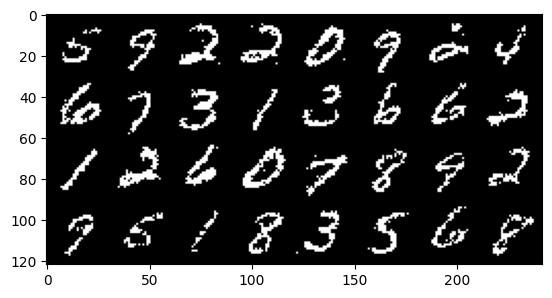

In [1]:
import numpy as np
import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
from torchvision.utils import make_grid , save_image
import matplotlib.pyplot as plt


batch_size = 64
train_loader = torch.utils.data.DataLoader(
datasets.MNIST('./data',
    train=True,
    download = True,
    transform = transforms.Compose(
        [transforms.ToTensor()])
     ),
     batch_size=batch_size
)

test_loader = torch.utils.data.DataLoader(
datasets.MNIST('./data',
    train=False,
    transform=transforms.Compose(
    [transforms.ToTensor()])
    ),
    batch_size=batch_size)


class RBM(nn.Module):
   def __init__(self,
               n_vis=784,
               n_hin=500,
               k=5):
        super(RBM, self).__init__()
        self.W = nn.Parameter(torch.randn(n_hin,n_vis)*1e-2)
        self.v_bias = nn.Parameter(torch.zeros(n_vis))
        self.h_bias = nn.Parameter(torch.zeros(n_hin))
        self.k = k
    
   def sample_from_p(self,p):
       return F.relu(torch.sign(p - Variable(torch.rand(p.size()))))
    
   def v_to_h(self,v):
        p_h = F.sigmoid(F.linear(v,self.W,self.h_bias))
        sample_h = self.sample_from_p(p_h)
        return p_h,sample_h
    
   def h_to_v(self,h):
        p_v = F.sigmoid(F.linear(h,self.W.t(),self.v_bias))
        sample_v = self.sample_from_p(p_v)
        return p_v,sample_v
        
   def forward(self,v):
        pre_h1,h1 = self.v_to_h(v)
        
        h_ = h1
        for _ in range(self.k):
            pre_v_,v_ = self.h_to_v(h_)
            pre_h_,h_ = self.v_to_h(v_)
        
        return v,v_
    
   def free_energy(self,v):
        vbias_term = v.mv(self.v_bias)
        wx_b = F.linear(v,self.W,self.h_bias)
        hidden_term = wx_b.exp().add(1).log().sum(1)
        return (-hidden_term - vbias_term).mean()




rbm = RBM(k=1)
train_op = optim.SGD(rbm.parameters(),0.1)

for epoch in range(10):
    loss_ = []
    for _, (data,target) in enumerate(train_loader):
        data = Variable(data.view(-1,784))
        sample_data = data.bernoulli()
        
        v,v1 = rbm(sample_data)
        loss = rbm.free_energy(v) - rbm.free_energy(v1)
        loss_.append(loss.data)
        train_op.zero_grad()
        loss.backward()
        train_op.step()

    print("Training loss for {} epoch: {}".format(epoch, np.mean(loss_)))


def show_adn_save(file_name,img):
    npimg = np.transpose(img.numpy(),(1,2,0))
    f = "./%s.png" % file_name
    plt.imshow(npimg)
    plt.imsave(f,npimg)

show_adn_save("real",make_grid(v.view(32,1,28,28).data))
show_adn_save("generate",make_grid(v1.view(32,1,28,28).data))

## Energy-based models and Langevin sampling

See discussions in Foster, chapter 7 on energy-based models at <https://github.com/davidADSP/Generative_Deep_Learning_2nd_Edition/tree/main/notebooks/07_ebm/01_ebm>

That notebook is based on a recent article by Du and Mordatch, **Implicit generation and modeling with energy-based models**, see <https://arxiv.org/pdf/1903.08689.pdf.>

## Tensor-flow examples

1. To create Boltzmann machine using Keras, see Babcock and Bali chapter 4, see <https://github.com/PacktPublishing/Hands-On-Generative-AI-with-Python-and-TensorFlow-2/blob/master/Chapter_4/models/rbm.py>

2. See also Foster, chapter 7 on energy-based models at <https://github.com/davidADSP/Generative_Deep_Learning_2nd_Edition/tree/main/notebooks/07_ebm/01_ebm>